In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
X_train= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/X_train')
y_train= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/y_train')
X_val= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/X_val')
y_val= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/y_val')
X_test= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/X_test')
y_test= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/y_test')

In [3]:
from sklearn.model_selection import RandomizedSearchCV

In [4]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 400, 800]}
xgbr = xgb.XGBRegressor(seed = 42)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=2)

In [5]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=100, subsample=0.5; total time=   8.5s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=100, subsample=0.5; total time=   7.8s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=100, subsample=0.5; total time=   7.4s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=100, subsample=0.5; total time=  14.7s
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=3, n_estimators=800, subsample=0.6; total time=  48.7s
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.799

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          predictor=None, random_state=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 400, 800],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=2)

In [6]:
clf.best_params_

{'subsample': 0.6,
 'n_estimators': 800,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.8999999999999999}

In [5]:
best_params = {'subsample': 0.6,
 'n_estimators': 800,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.8999999999999999}

In [6]:
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8999999999999999, colsample_bynode=None,
             colsample_bytree=0.7999999999999999, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
train_preds = best_xgb.predict(X_train)

In [8]:
val_preds = best_xgb.predict(X_val)

In [9]:
train_xgb_mae = mean_absolute_error(y_train,train_preds)
train_xgb_rmse = np.sqrt(mean_squared_error(y_train,train_preds))

print(train_xgb_mae,train_xgb_rmse)

20.047570908970393 35.009970128854214


In [10]:
val_xgb_mae = mean_absolute_error(y_val,val_preds)
val_xgb_rmse = np.sqrt(mean_squared_error(y_val,val_preds))

print(val_xgb_mae,val_xgb_rmse)

15.254687113812523 29.636863868625593


In [29]:
results = {'val_mae': [val_xgb_mae, 19.8256858531995,13.201881142827268, 13.40491847030531, 13.477657713822667], 'val_rmse': [val_xgb_rmse, 35.55871223740521,30.23898554625491, 29.66635572464746, 29.37284026722243], 'train_mae': [train_xgb_mae, 21.640588195716617, 19.567185907237512, 19.716207542261298, 20.003170804056843], 'train_rmse': [train_xgb_rmse, 36.86726785950092,39.3461915675577, 38.63243090835238, 38.4863944937623]}
results_2 = {'Method': ['xgboost', 'Random Forest', '4 week Rolling Window','6 week Rolling Window','8 week Rolling Window','xgboost', 'Random Forest', '4 week Rolling Window','6 week Rolling Window','8 week Rolling Window','xgboost', 'Random Forest', '4 week Rolling Window','6 week Rolling Window','8 week Rolling Window','xgboost', 'Random Forest', '4 week Rolling Window','6 week Rolling Window','8 week Rolling Window'], 'Type':['train_rmse','train_rmse','train_rmse','train_rmse','train_rmse','train_mae','train_mae','train_mae','train_mae','train_mae','val_rmse','val_rmse','val_rmse','val_rmse','val_rmse','val_mae','val_mae','val_mae','val_mae','val_mae'], 'Value': [train_xgb_rmse, 36.86726785950092,39.3461915675577, 38.63243090835238, 38.4863944937623, train_xgb_mae, 21.640588195716617, 19.567185907237512, 19.716207542261298, 20.003170804056843, val_xgb_mae, 19.8256858531995,13.201881142827268, 13.40491847030531, 13.477657713822667,val_xgb_mae, 19.8256858531995,13.201881142827268, 13.40491847030531, 13.477657713822667]}

In [31]:
results_df = pd.DataFrame(results_2)

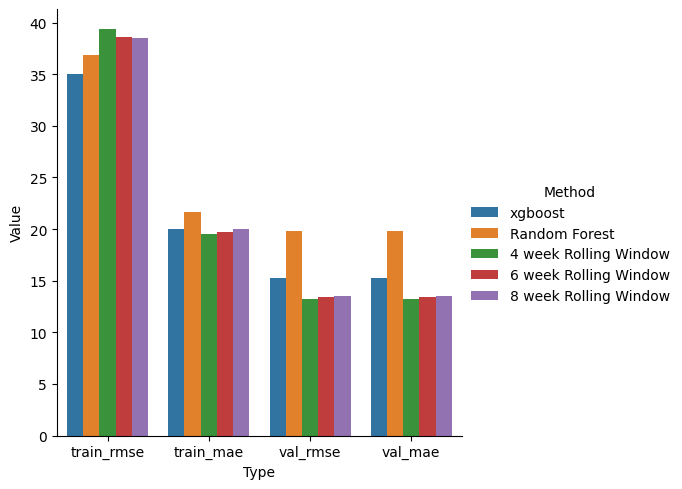

In [34]:
sns.catplot(data=results_df, x= 'Type', y = 'Value', kind = 'bar', hue ='Method' )

array([ 3.9791338,  5.972955 ,  4.8140764, ..., 34.84144  , 30.50628  ,
       62.94195  ], dtype=float32)